<a href="https://colab.research.google.com/github/VavRe/information-retrieval-ut/blob/main/CA6/IR_CA6_Q2_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/IR/BBC News.csv')

In [ ]:
X = df["News"]
X

0       worldcom ex-boss launches defence lawyers defe...
1       german business confidence slides german busin...
2       bbc poll indicates economic gloom citizens in ...
3       lifestyle  governs mobile choice  faster  bett...
4       enron bosses in $168m payout eighteen former e...
                              ...                        
2220    eu to probe alitalia  state aid  the european ...
2221    u2 to play at grammy awards show irish rock ba...
2222    sport betting rules in spotlight a group of mp...
2223    alfa romeos  to get gm engines  fiat is to sto...
2224    citizenship event for 18s touted citizenship c...
Name: News, Length: 2225, dtype: object

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
tokenized_X = [word_tokenize(sample) for  sample in X]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import re
ps = PorterStemmer()
nonstop_tokenized_X = tokenized_X.copy()
for idx, sentence in enumerate(tokenized_X):
  nonstop_tokenized_X[idx] = [ps.stem(word) for word in sentence if not word.lower() in stop_words and not re.search('[0-9]', word) ]
  print(f" on {idx} : { len(tokenized_X[idx]) - len(nonstop_tokenized_X[idx])} words removed")
  print("============")

 on 0 : 118 words removed
 on 1 : 130 words removed
 on 2 : 246 words removed
 on 3 : 288 words removed
 on 4 : 156 words removed
 on 5 : 128 words removed
 on 6 : 181 words removed
 on 7 : 96 words removed
 on 8 : 171 words removed
 on 9 : 91 words removed
 on 10 : 265 words removed
 on 11 : 86 words removed
 on 12 : 94 words removed
 on 13 : 150 words removed
 on 14 : 178 words removed
 on 15 : 143 words removed
 on 16 : 408 words removed
 on 17 : 124 words removed
 on 18 : 105 words removed
 on 19 : 111 words removed
 on 20 : 154 words removed
 on 21 : 151 words removed
 on 22 : 69 words removed
 on 23 : 129 words removed
 on 24 : 150 words removed
 on 25 : 188 words removed
 on 26 : 373 words removed
 on 27 : 306 words removed
 on 28 : 129 words removed
 on 29 : 150 words removed
 on 30 : 166 words removed
 on 31 : 121 words removed
 on 32 : 169 words removed
 on 33 : 92 words removed
 on 34 : 131 words removed
 on 35 : 89 words removed
 on 36 : 213 words removed
 on 37 : 126 words

In [ ]:
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary

coherence=[]

for k in range(1,20):

    dictionary = Dictionary(nonstop_tokenized_X)
    corpus = [dictionary.doc2bow(text) for text in nonstop_tokenized_X]
    lda = LdaModel(corpus=corpus, num_topics=k, id2word=dictionary, iterations=10)
    cm = CoherenceModel(model=lda, corpus=corpus, texts=nonstop_tokenized_X,  coherence='c_v')
    coherence.append(cm.get_coherence())



In [ ]:
coherence

[0.2379494837662947,
 0.23595037932542035,
 0.2479555789290341,
 0.2436097842644345,
 0.24802847021536908,
 0.24631455367087352,
 0.24612447937211326,
 0.2547256521792922,
 0.25919382514201394,
 0.24638205168446267,
 0.2448132531520704,
 0.2520975601713169,
 0.24757635910119755,
 0.24451778358582188,
 0.25256520464465176,
 0.25603048677601026,
 0.25382837675838654,
 0.25450240831640814,
 0.2501441560506244]

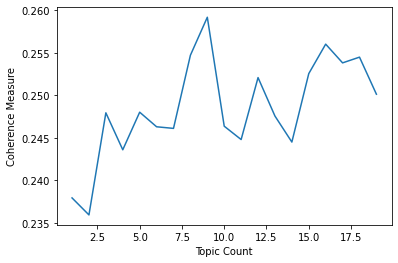

In [ ]:
import matplotlib.pyplot as plt
x = range(1,20)
plt.plot(x, coherence)
# plt.xticks(x)
plt.xlabel("Topic Count")
plt.ylabel("Coherence Measure")
plt.show()
